# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [45]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
#ride_count

In [46]:
# 2. Get the total drivers for each city type
drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
#drivers_count

In [47]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
#sum_fares_by_type

In [68]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_ride = sum_fares_by_type / ride_count
#average_fare_by_ride

In [69]:
# 5. Get the average fare per driver for each city type. 
average_fare_by_driver = sum_fares_by_type / drivers_count
#average_fare_by_driver

In [74]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count,
          "Total Drivers": drivers_count,
          "Total Fares": sum_fares_by_type,
          "Average fare per ride": average_fare_by_ride,
          "Average fare per driver": average_fare_by_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [71]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [75]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map("${:.2f}".format)
pyber_summary_df["Average fare per driver"] = pyber_summary_df["Average fare per driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [78]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [90]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_sum_type_date2 = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fareframe_df = pd.DataFrame(
          {"Total Fare": fares_sum_type_date2,})
fareframe_df.head()

Total Fare
type  date                           
Rural 2019-01-01 09:45:36       43.69
      2019-01-02 11:18:32       52.12
      2019-01-03 19:51:01       19.90
      2019-01-04 03:31:26       24.88
      2019-01-06 07:38:40       47.33

In [91]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#df = df.reset_index
fareframe_df = fareframe_df.reset_index()
fareframe_df.head()

,type,date,Total Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [92]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fareframe_df_pivot = fareframe_df.pivot(index = "date", columns = "type", values = "Total Fare")
fareframe_df_pivot.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [93]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_frame_df = fareframe_df_pivot.loc['2019-01-01':'2019-04-28']
date_frame_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [94]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_frame_df.index = pd.to_datetime(date_frame_df.index)

In [95]:
# 7. Check that the datatype for the index is datetime using df.info()
date_frame_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [97]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_frame_df_week = date_frame_df.resample('W').sum()
date_frame_df_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


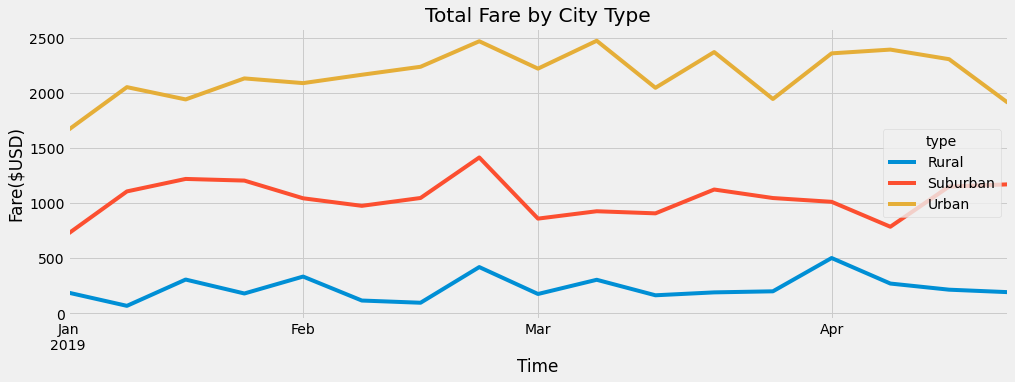

In [103]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

date_frame_df_week.plot(figsize=(15,5),)
plt.xlabel('Time')
plt.ylabel('Fare($USD)')
plt.title('Total Fare by City Type')
plt.savefig('Analysis/Pyber_fare_summary.png')